# Dengue em Pernambuco

Projeto final da disciplina **Forecasting**

**Aluna:** Fernanda de Queiroz Souza

## Bibliotecas

In [109]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
import os
import datetime
from datetime import datetime, date, time, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
import  warnings 
warnings.simplefilter('ignore')

In [3]:
# Configurando tamanho das imagens
rcParams['figure.figsize'] = 15, 6

## Leitura dos dados

In [8]:
original_path = os.getcwd()
original_path

'C:\\Users\\Fernanda.Souza\\OneDrive - Unilever\\Documents\\Jupyter\\MBA'

In [9]:
os.chdir('C:/Users/Fernanda.Souza/OneDrive - Unilever/Documents/Jupyter/MBA/ProjetoFinal')

In [85]:
df = pd.read_excel('dengue_pernambuco.xlsx')

## Análise dos dados

In [86]:
df

,semana,valor
0,2000-01-08,686
1,2000-01-15,611
2,2000-01-22,614
3,2000-01-29,598
4,2000-02-05,785
...,...,...
882,2016-12-03,73
883,2016-12-10,97
884,2016-12-17,80
885,2016-12-24,50


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   semana  887 non-null    object
 1   valor   887 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


> A coluna "semana" está como objeto mas deveria ser um atributo de data.

In [88]:
# Modificando o tipo de variavel da coluna "semana" para o tipo data

df['semana'] = pd.to_datetime(df['semana'], format='%Y/%m/%d')

In [89]:
df.info()

In [90]:
# Renomeando as colunas para serem mais intuitivas

df = df.rename(columns = {'semana': 'data', 
                          'valor': 'ncasos', 
                         })

In [91]:
df

In [92]:
# Conferindo se realmente não tem nenhum dado faltante na série

print(f'Valores faltantes: {df.isnull().values.any()}!')

Valores faltantes: False!


## Análise da série

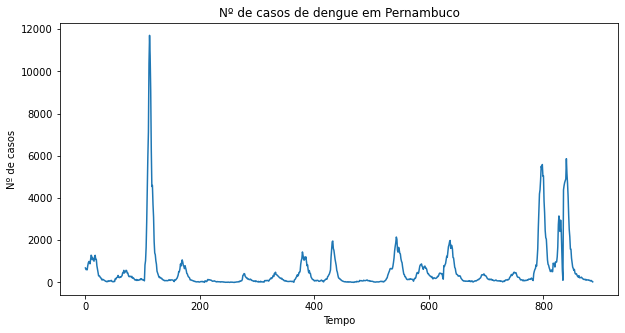

In [93]:
plt.figure(figsize=(10,5))
plt.title('Nº de casos de dengue em Pernambuco')
plt.xlabel("Tempo")
plt.ylabel("Nº de casos")
plt.plot(df['ncasos'])

In [97]:
df.set_index('data',inplace=True)
df.index=pd.to_datetime(df.index)

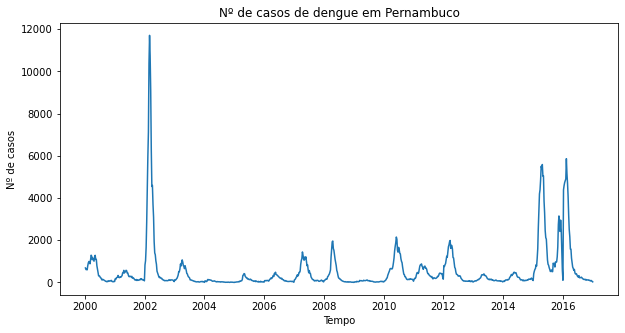

In [98]:
plt.figure(figsize=(10,5))
plt.title('Nº de casos de dengue em Pernambuco')
plt.xlabel("Tempo")
plt.ylabel("Nº de casos")
plt.plot(df['ncasos'])

In [99]:
df_decomp = tsa.seasonal_decompose(df, period=12)

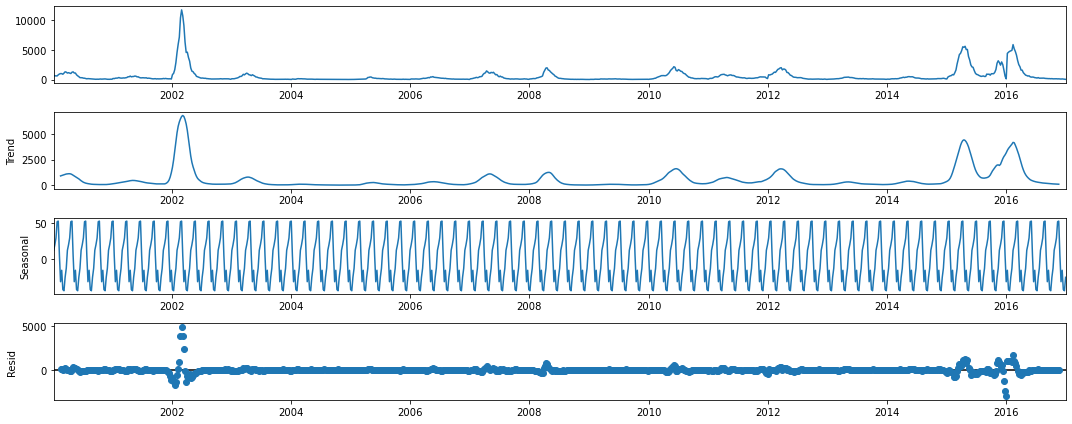

In [100]:
df_decomp.plot();

In [101]:
# A 13a observação será a média das 11 anteriores
#rolmean12 = df.rolling(window = 12).mean()
#print(rolmean12.head(15))

In [102]:
#rolstd12 = df.rolling(window = 12).std()
#print(rolstd12.head(15))

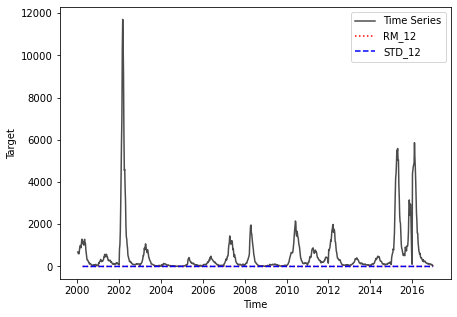

In [103]:
plt.figure(figsize=(7, 5))
actual = plt.plot(df['ncasos'], color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

In [105]:
adf = adfuller(df)
print(f'p-valor: {round(adf[1],2)}')

p-valor: 0.0


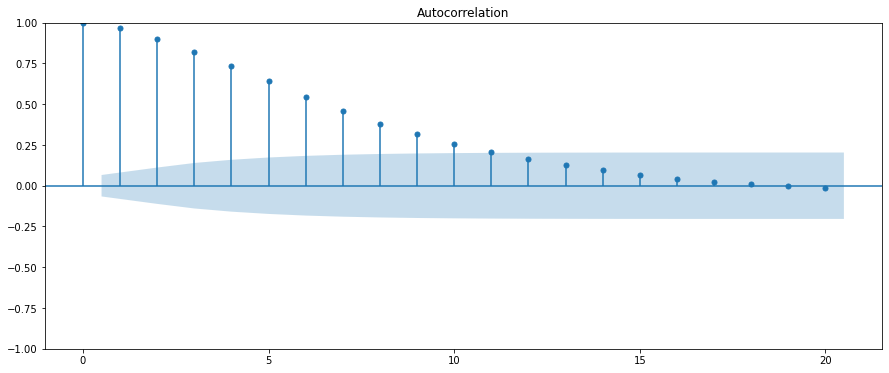

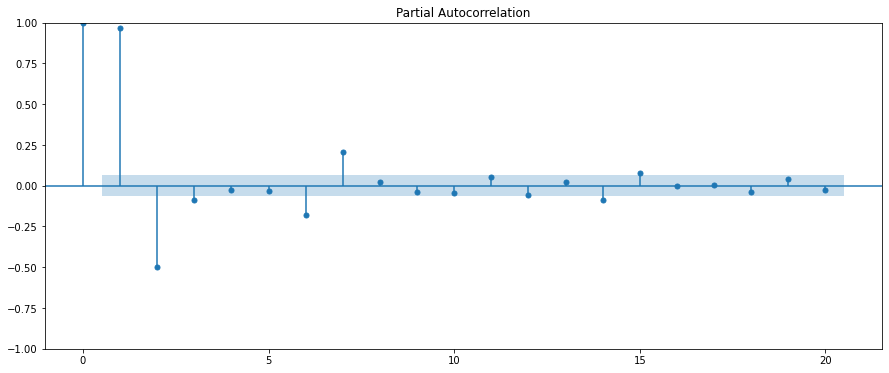

In [107]:
plot_acf(df, lags=20)
plot_pacf(df, lags=20)
plt.show()

## LIXO

### Eliminação da Tendência por Diferenciação

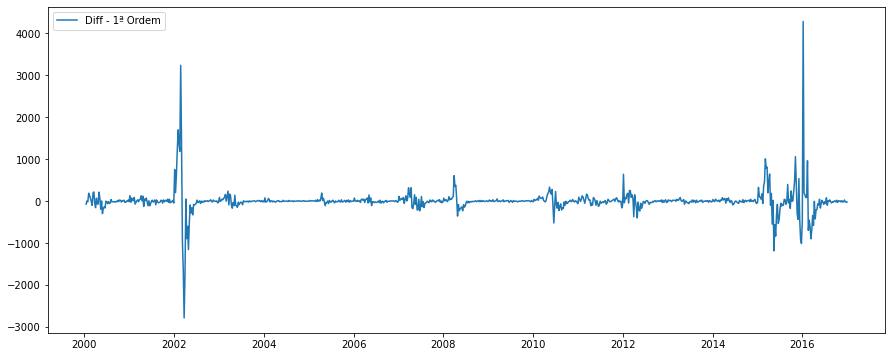

In [50]:
df_1ordem = df.diff()
plt.plot(df_1ordem, label="Diff - 1ª Ordem")
plt.legend(loc='best')
plt.show()

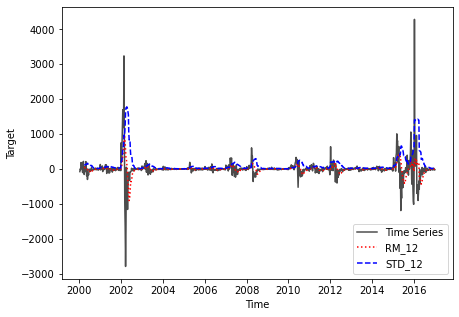

In [51]:
# A 13a observação será a média das 11 anteriores
rolmean12 = df.diff().rolling(window = 12).mean()
rolstd12 = df.diff().rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(df['ncasos'].diff(), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

In [60]:
#df_logged = df["ncasos"].apply(lambda x : np.log(x))

#ax1 = plt.subplot()
#df_logged.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);

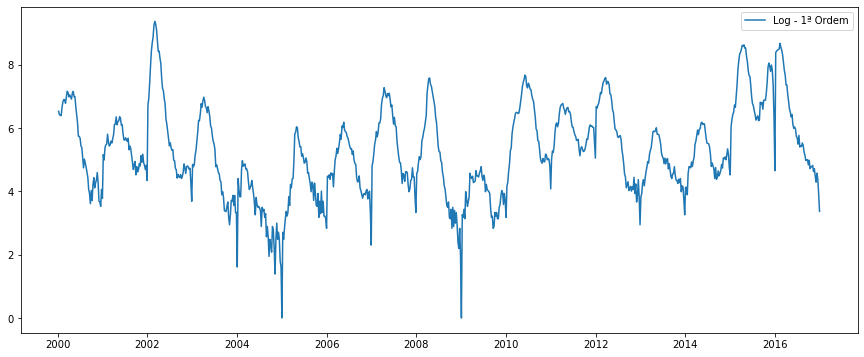

In [59]:
df_logg = np.log(df)
plt.plot(df_logg, label = "Log - 1ª Ordem")
plt.legend(loc = 'best')
plt.show()

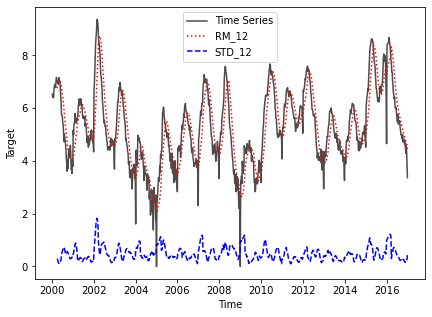

In [61]:
rolmean12 = np.log(df).rolling(window = 12).mean()
rolstd12 = np.log(df).rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(np.log(df['ncasos']), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

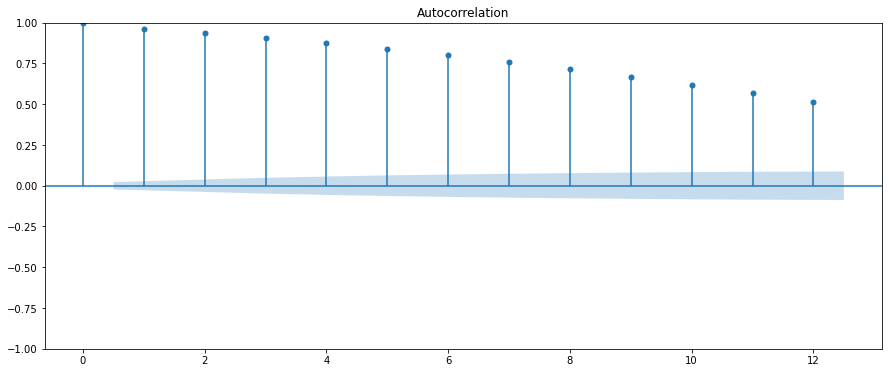

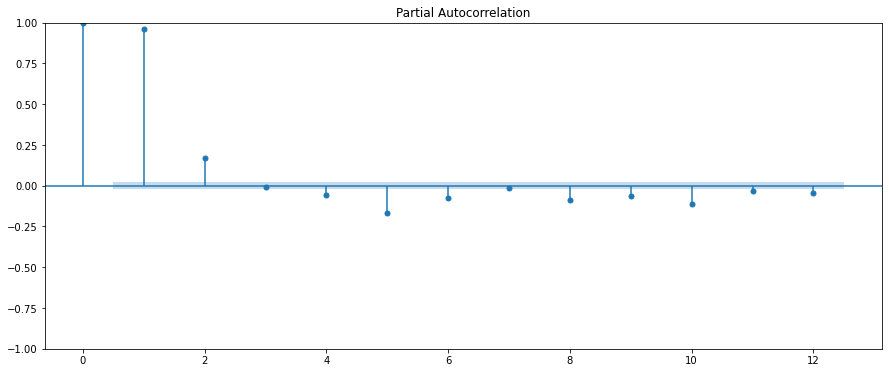

In [62]:
plot_acf(df_logg.dropna(), lags=12, alpha=0.5);
plot_pacf(df_logg.dropna(), lags=12, alpha=0.5);

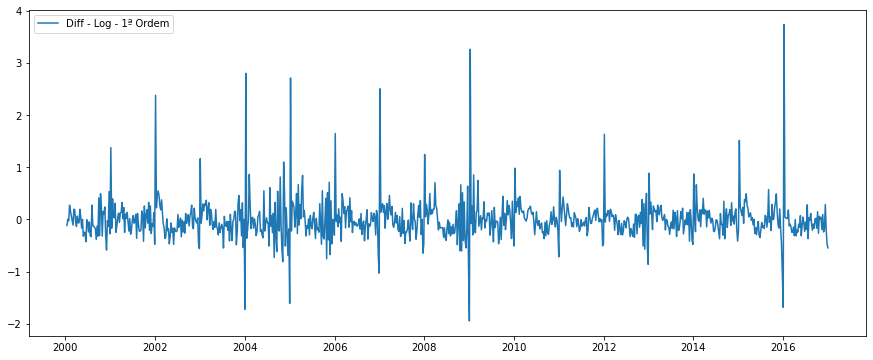

In [66]:
df_diff_logg = df_logg.diff()
plt.plot(df_diff_logg, label="Diff - Log - 1ª Ordem")
plt.legend(loc='best')
plt.show()

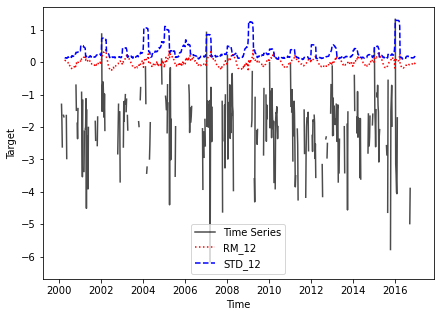

In [68]:
rolmean12 = df_diff_logg.rolling(window = 12).mean()
rolstd12 = df_diff_logg.rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(np.log(df_diff_logg['ncasos']), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

In [67]:
#df_logg2 = np.log(df_logg)
#plt.plot(df_logg, label = "Log - 2ª Ordem")
#plt.legend(loc = 'best')
#plt.show()

In [69]:
#rolmean12 = np.log(df_logg).rolling(window = 12).mean()
#rolstd12 = np.log(df_logg).rolling(window = 12).std()
#plt.figure(figsize=(7, 5))
#actual = plt.plot(np.log(df_logg['ncasos']), color='black', label='Time Series', alpha=0.7)
#rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
#std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
#plt.legend(loc='best')
#plt.xlabel("Time")
#plt.ylabel("Target")
#plt.show()

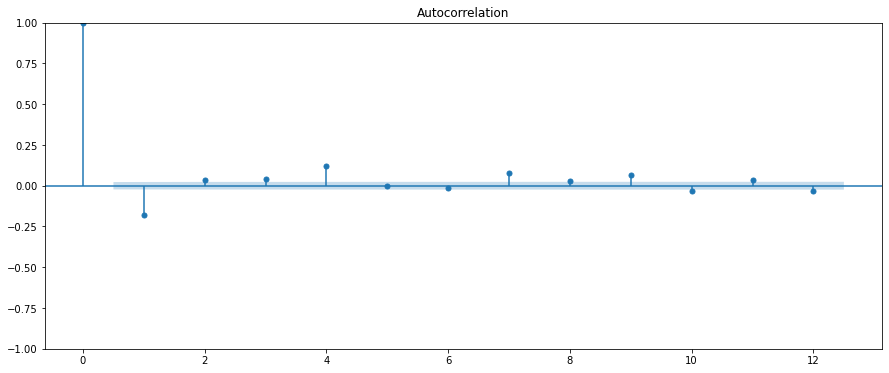

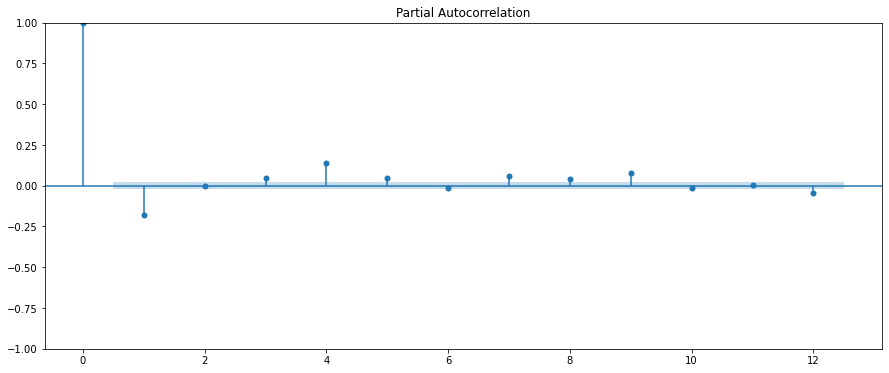

In [70]:
plot_acf(df_diff_logg.dropna(), lags=12, alpha=0.5);
plot_pacf(df_diff_logg.dropna(), lags=12, alpha=0.5);